# Two Sigma: Using News to Predict Stock Movements
https://www.kaggle.com/artgor/eda-feature-engineering-and-everything

In [1]:
import pandas as pd
import numpy as np
import os
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline 

In [2]:
PATH_DATA = "./all"

In [3]:
market_train_df = pd.read_csv(os.path.join(PATH_DATA,"marketdata_sample.csv"),parse_dates=[0])

In [4]:
news_train_df = pd.read_csv(os.path.join(PATH_DATA,"news_sample.csv"),parse_dates=[0])

# Market dataset

In [5]:
print(f'{market_train_df.shape[0]} samples and {market_train_df.shape[1]} features in the training market dataset.')

100 samples and 16 features in the training market dataset.


In [6]:
market_train_df.head()

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2007-02-01 22:00:00,A.N,Agilent Technologies Inc,1.0,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672
1,2007-02-01 22:00:00,AAI.N,AirTran Holdings Inc,0.0,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803
2,2007-02-01 22:00:00,AAP.N,Advance Auto Parts Inc,1.0,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433
3,2007-02-01 22:00:00,AAPL.O,Apple Inc,1.0,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425
4,2007-02-01 22:00:00,ABB.N,ABB Ltd,1.0,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994


In [7]:
market_train_df.columns.tolist()

['time',
 'assetCode',
 'assetName',
 'universe',
 'volume',
 'close',
 'open',
 'returnsClosePrevRaw1',
 'returnsOpenPrevRaw1',
 'returnsClosePrevMktres1',
 'returnsOpenPrevMktres1',
 'returnsClosePrevRaw10',
 'returnsOpenPrevRaw10',
 'returnsClosePrevMktres10',
 'returnsOpenPrevMktres10',
 'returnsOpenNextMktres10']

In [8]:
market_train_df.describe()

,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,0.0,0.0,100.000000,100.000000,0.0,0.0,100.000000
mean,0.680000,2.980183e+06,37.709300,37.569200,0.008372,0.010669,NaN,NaN,0.025794,0.016831,NaN,NaN,0.011293
std,0.468826,5.137100e+06,22.929333,22.932147,0.019966,0.020692,NaN,NaN,0.059680,0.056358,NaN,NaN,0.044578
min,0.000000,1.177000e+05,3.170000,3.230000,-0.045970,-0.067812,NaN,NaN,-0.158333,-0.128619,NaN,NaN,-0.101874
25%,0.000000,4.898000e+05,22.095000,21.947500,0.000655,0.000863,NaN,NaN,0.002704,-0.006739,NaN,NaN,-0.013352
50%,1.000000,1.277200e+06,32.930000,32.625000,0.008288,0.009356,NaN,NaN,0.021168,0.010103,NaN,NaN,0.013607
75%,1.000000,2.815250e+06,48.485000,47.775000,0.015538,0.019507,NaN,NaN,0.049341,0.040637,NaN,NaN,0.041825
max,1.000000,2.635671e+07,118.210000,117.770000,0.108438,0.107302,NaN,NaN,0.309783,0.266191,NaN,NaN,0.136984


In [9]:
market_train_df.sample(2)

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
50,2007-02-01 22:00:00,AIN.N,Albany International Corp,0.0,117700.0,34.29,33.94,0.010312,0.002955,NaN,NaN,0.048945,0.039510,NaN,NaN,-0.018636
8,2007-02-01 22:00:00,ABT.N,Abbott Laboratories,1.0,5692300.0,52.87,52.50,-0.002453,-0.004739,NaN,NaN,0.001515,-0.004928,NaN,NaN,0.009861


In [10]:
plotly.tools.set_credentials_file(username='jolivaresc', api_key='rzXBKEK6koKC1CzuKqMn')

In [11]:
data = []
for asset in np.random.choice(market_train_df['assetName'].unique(), 10):
    asset_df = market_train_df[(market_train_df['assetName'] == asset)]

    data.append(go.Scatter(
        x = asset_df['time'].dt.strftime(date_format='%Y-%m-%d').values,
        y = asset_df['close'].values,
        name = asset
    ))
layout = go.Layout(dict(title = "Closing prices of 10 random assets",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [12]:
print(f"close mean: {market_train_df.close.mean()}\nclose standard deviation {market_train_df.close.std()}")

close mean: 37.709299999999985
close standard deviation 22.92933343619659


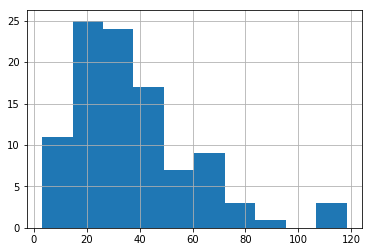

In [13]:
market_train_df.close.hist()

close mean: 37.5692
close standard deviation 22.932146537297395


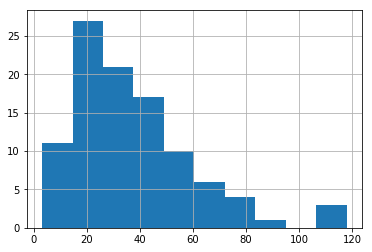

In [14]:
print(f"close mean: {market_train_df.open.mean()}\nclose standard deviation {market_train_df.open.std()}")
market_train_df.open.hist()

In [15]:
from collections import Counter

## solo hay datos de un día 

In [16]:
Counter(market_train_df.time.tolist())

Counter({Timestamp('2007-02-01 22:00:00'): 100})

In [17]:
market_train_df['price_diff'] = market_train_df['close'] - market_train_df['open']

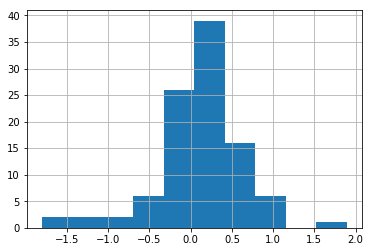

In [18]:
market_train_df.price_diff.hist()

In [19]:
np.amax(market_train_df.price_diff),np.amin(market_train_df.price_diff)

(1.8900000000000006, -1.7999999999999972)

In [20]:
market_train_df.sort_values('price_diff',ascending=True)[:5]

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,price_diff
23,2007-02-01 22:00:00,ADS.N,Alliance Data Systems Corp,1.0,2963800.0,66.20,68.00,-0.025467,0.018727,NaN,NaN,0.036643,0.062666,NaN,NaN,-0.042951,-1.80
3,2007-02-01 22:00:00,AAPL.O,Apple Inc,1.0,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,-1.49
92,2007-02-01 22:00:00,APA.N,Apache Corp,1.0,6339700.0,71.57,72.69,-0.019186,0.014232,NaN,NaN,0.090175,0.098700,NaN,NaN,-0.001529,-1.12
57,2007-02-01 22:00:00,AKAM.O,Akamai Technologies Inc,1.0,2801000.0,55.51,56.61,-0.011926,0.016520,NaN,NaN,0.050530,0.064698,NaN,NaN,0.013804,-1.10
96,2007-02-01 22:00:00,APKT.O,Acme Packet Inc,0.0,876166.0,15.15,16.01,-0.045970,-0.030872,NaN,NaN,-0.158333,-0.119217,NaN,NaN,0.136984,-0.86


In [21]:
market_train_df['close_to_open'] =np.abs(market_train_df['close'] / market_train_df['open'])

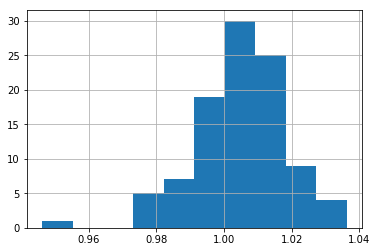

In [22]:
market_train_df.close_to_open.hist()

In [23]:
# No hay outliers en los datos
print(f"In {(market_train_df['close_to_open'] >= 2).sum()} lines price increased by 100% or more.")
print(f"In {(market_train_df['close_to_open'] <= 0.5).sum()} lines price decreased by 100% or more.")

In 0 lines price increased by 100% or more.
In 0 lines price decreased by 100% or more.


# News dataset

In [24]:
news_train_df.head()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...","{'O', 'Z', 'OIL'}",...,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'BD', 'INS', 'LATAM', 'CA', 'US', 'MX', 'IL',...","{'PGE', 'PCU', 'PCO', 'DNP', 'MD', 'E', 'G', '...",...,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 11:29:56,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'IQ', 'RO', 'US', 'ID', 'RET', 'RTRS', 'ENR',...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,5,11,17
3,2007-01-01 12:08:37,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,5,13,15
4,2007-01-01 12:08:37,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,0,0,0


In [25]:
news_train_df.columns

Index(['time', 'sourceTimestamp', 'firstCreated', 'sourceId', 'headline',
       'urgency', 'takeSequence', 'provider', 'subjects', 'audiences',
       'bodySize', 'companyCount', 'headlineTag', 'marketCommentary',
       'sentenceCount', 'wordCount', 'assetCodes', 'assetName',
       'firstMentionSentence', 'relevance', 'sentimentClass',
       'sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
       'sentimentWordCount', 'noveltyCount12H', 'noveltyCount24H',
       'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
       'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D',
       'volumeCounts7D'],
      dtype='object')

In [26]:
print(f'{news_train_df.shape[0]} samples and {news_train_df.shape[1]} features in the training news dataset.')

100 samples and 35 features in the training news dataset.


In [27]:
text = ' '.join(news_train_df['headline'].str.lower())

In [28]:
wordcloud = WordCloud(max_font_size=None, stopwords=STOPWORDS, background_color='white',
                      width=1200, height=1000).generate(text)

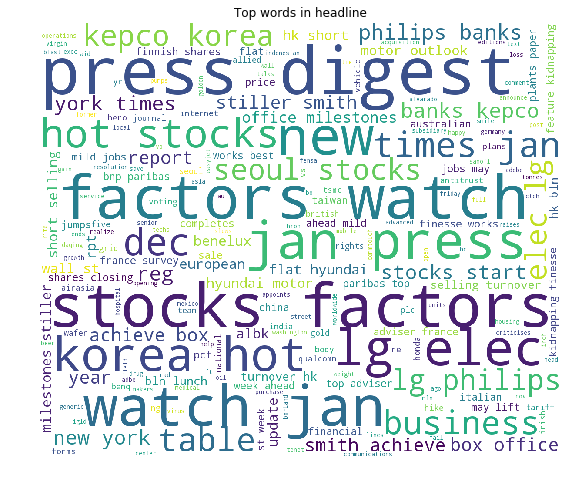

In [29]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Top words in headline')
plt.axis("off")
plt.show()

In [30]:
np.max(news_train_df["urgency"]),np.min(news_train_df["urgency"])

(3, 1)

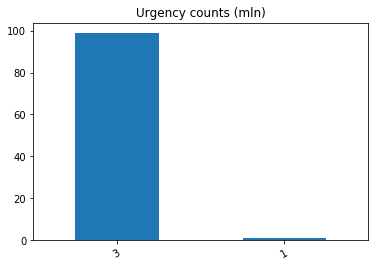

In [31]:
(news_train_df['urgency'].value_counts()).plot('bar')
plt.xticks(rotation=30);
plt.title('Urgency counts (mln)')

In [32]:
news_train_df.wordCount

0      275
1      907
2      388
3      325
4      325
5      325
6      325
7      325
8      325
9      315
10    1674
11    1674
12    1674
13     907
14     828
15    1051
16     239
17     239
18     305
19     402
20     214
21     292
22     292
23     292
24     907
25     579
26     579
27     579
28     579
29     579
      ... 
70     354
71     560
72     314
73     345
74     836
75     838
76     242
77     126
78     116
79     116
80     349
81     349
82     582
83     164
84     164
85     164
86     732
87     732
88    1040
89    1040
90    1051
91    1051
92     899
93    1416
94     175
95     181
96     134
97     130
98     136
99     118
Name: wordCount, Length: 100, dtype: int64

### longitud de oraciones

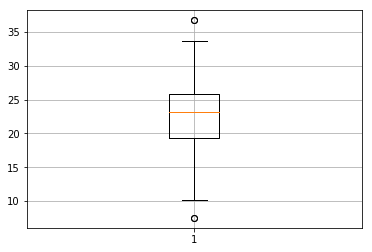

In [33]:
news_train_df['sentence_word_count'] =  news_train_df['wordCount'] / news_train_df['sentenceCount']
plt.grid()
plt.boxplot(news_train_df['sentence_word_count'][news_train_df['sentence_word_count'] <40]);

In [34]:
news_train_df['provider'].value_counts().head(10)

RTRS    87
RNS      6
BSW      5
PRN      2
Name: provider, dtype: int64

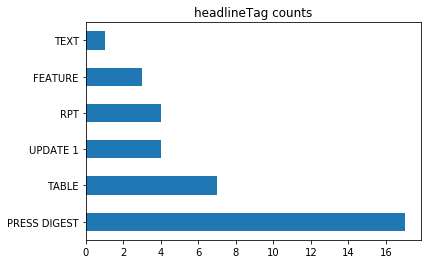

In [35]:
(news_train_df['headlineTag'].value_counts()).plot('barh');
plt.title('headlineTag counts');

In [36]:
news_train_df.loc[news_train_df['sentimentClass']]

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D,sentence_word_count
-1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2007-01-01 04:29:32,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3.0,1.0,RTRS,"{'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...","{'O', 'Z', 'OIL'}",...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,25.000000
0,2007-01-01 04:29:32,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3.0,1.0,RTRS,"{'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...","{'O', 'Z', 'OIL'}",...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,25.000000
0,2007-01-01 04:29:32,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3.0,1.0,RTRS,"{'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...","{'O', 'Z', 'OIL'}",...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,25.000000
1,2007-01-01 07:03:35,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3.0,1.0,RTRS,"{'BD', 'INS', 'LATAM', 'CA', 'US', 'MX', 'IL',...","{'PGE', 'PCU', 'PCO', 'DNP', 'MD', 'E', 'G', '...",...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,16.490909


In [37]:
for i, j in zip([-1, 0, 1], ['negative', 'neutral', 'positive']):
    df_sentiment = news_train_df.loc[news_train_df['sentimentClass'] == i, 'assetName']
    print(f'Top mentioned companies for {j} sentiment are:')
    print(df_sentiment.value_counts().head(5))
    print('')

Top mentioned companies for negative sentiment are:
Banco Santander SA               5
Kookmin Bank                     3
Travelers Companies Inc          3
Sanofi SA                        2
Woori Finance Holdings Co Ltd    2
Name: assetName, dtype: int64

Top mentioned companies for neutral sentiment are:
Taiwan Semiconductor Manufacturing Co Ltd    3
HSBC Holdings PLC                            2
China Mobile Ltd                             2
Corus Group Ltd                              2
Microsoft Corp                               2
Name: assetName, dtype: int64

Top mentioned companies for positive sentiment are:
Korea Electric Power Corp           5
Twenty-First Century Fox Inc        2
Kookmin Bank                        2
Royal Bank of Scotland Group PLC    2
LG Display Co Ltd                   2
Name: assetName, dtype: int64



In [46]:
market_train_df.columns

Index(['time', 'assetCode', 'assetName', 'universe', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'price_diff', 'close_to_open'],
      dtype='object')

# adaptar nuevo dataset

In [49]:
names = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]

In [50]:
new_df = pd.DataFrame(columns=names)

In [51]:
new_df

,Date,Open,High,Low,Close,Adj Close,Volume
